In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

df = pd.read_csv("Cleaned.csv")

X = np.array(df.drop(['Grade'], 1))
y = np.array(df['Grade'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Define the parameter grid for grid search
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

# Create the Naive Bayes classifier
naive_bayes = GaussianNB()

# Perform grid search with cross-validation
grid_search = GridSearchCV(naive_bayes, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Fit the model with the best hyperparameters using the training set
best_naive_bayes = GaussianNB(**best_params)
best_naive_bayes.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_naive_bayes.predict(X_test)

print("Test Accuracy:", best_naive_bayes.score(X_test, y_test))
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))


Best Hyperparameters: {'var_smoothing': 1e-07}
Best Score: 0.6782130056323605
Test Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

           0      0.928     0.525     0.670       122
           1      0.589     0.943     0.725        88

    accuracy                          0.700       210
   macro avg      0.758     0.734     0.698       210
weighted avg      0.786     0.700     0.693       210



C:\Users\ajed8\AppData\Local\Temp\ipykernel_10548\2460190566.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Grade'], 1))


C:\Users\ajed8\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


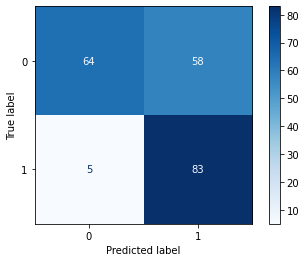

In [9]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_naive_bayes, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

In [10]:
import joblib

joblib.dump(best_naive_bayes, 'best_nb_model.pkl')

['best_nb_model.pkl']

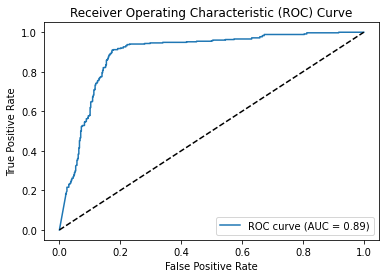

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = best_naive_bayes.predict_proba(X)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores)
auc = roc_auc_score(y, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [14]:
auc

0.8899323092031427